<h1>Finding Insights on the Dataset- final_dataset</h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv(r"E:\Education\college\internship\ds_ibm\Attention_Span_Prediction_Project\dataset\final_dataset.csv")

df.head()

,Content_ID,Content_Type,Content_Length,Scroll_Depth,Time_Spent,Interaction_Count,Platform,Time_Of_Day,Day_Of_Week,Device_Type,Title
0,T8769,Text,156,99.99,31.72,7,medium.com,Afternoon,Monday,Desktop,NaN
1,V3436,Video,181,NaN,35.48,7,YouTube,Afternoon,Monday,Tablet,First time getting betrayed by a girl : Traito...
2,T9777,Text,1726,100.00,30.46,1,towardsdatascience.com,Afternoon,Monday,Mobile,Machine Learning 101: Linear Regression
3,V3237,Video,156,NaN,104.81,10,YouTube,Afternoon,Monday,Tablet,Bohemian Rhapsody | Muppet Music Video | The M...
4,T8243,Text,43,100.00,28.20,8,techcrunch.com,Afternoon,Monday,Mobile,Artificial Intelligence (AI)


In [3]:
df.isnull().sum()

Content_ID             0
Content_Type           0
Content_Length         0
Scroll_Depth          20
Time_Spent             0
Interaction_Count      0
Platform             392
Time_Of_Day            2
Day_Of_Week            7
Device_Type            6
Title                 20
dtype: int64

In [4]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(464, 11)
Index(['Content_ID', 'Content_Type', 'Content_Length', 'Scroll_Depth',
       'Time_Spent', 'Interaction_Count', 'Platform', 'Time_Of_Day',
       'Day_Of_Week', 'Device_Type', 'Title'],
      dtype='object')
Content_ID            object
Content_Type          object
Content_Length         int64
Scroll_Depth         float64
Time_Spent           float64
Interaction_Count      int64
Platform              object
Time_Of_Day           object
Day_Of_Week           object
Device_Type           object
Title                 object
dtype: object


In [5]:
#Handling Missing values

#filling scroll_depth missing values with mean
text_scroll_mean = df[df['Content_Type'] == 'Text']['Scroll_Depth'].mean()
df['Scroll_Depth'] = df['Scroll_Depth'].fillna(text_scroll_mean)

# Fill missing values with mode
df['Platform'] = df['Platform'].fillna(df['Platform'].mode()[0])
df['Time_Of_Day'] = df['Time_Of_Day'].fillna(df['Time_Of_Day'].mode()[0])
df['Day_Of_Week'] = df['Day_Of_Week'].fillna(df['Day_Of_Week'].mode()[0])
df['Device_Type'] = df['Device_Type'].fillna(df['Device_Type'].mode()[0])


# Droping missing titles
df.drop(columns=['Title'], inplace=True)

#seeing no. of null values
df.isnull().sum()

Content_ID           0
Content_Type         0
Content_Length       0
Scroll_Depth         0
Time_Spent           0
Interaction_Count    0
Platform             0
Time_Of_Day          0
Day_Of_Week          0
Device_Type          0
dtype: int64

In [6]:
df.dtypes

Content_ID            object
Content_Type          object
Content_Length         int64
Scroll_Depth         float64
Time_Spent           float64
Interaction_Count      int64
Platform              object
Time_Of_Day           object
Day_Of_Week           object
Device_Type           object
dtype: object

Index(['Text', 'Video', 'Article', 'Podcast', 'Reel', 'Infographic',
       'Interactive'],
      dtype='object', name='Content_Type')
[ 30.59038462 454.76027778 525.73794872 557.5745     566.89285714
 630.28571429 650.75270833]


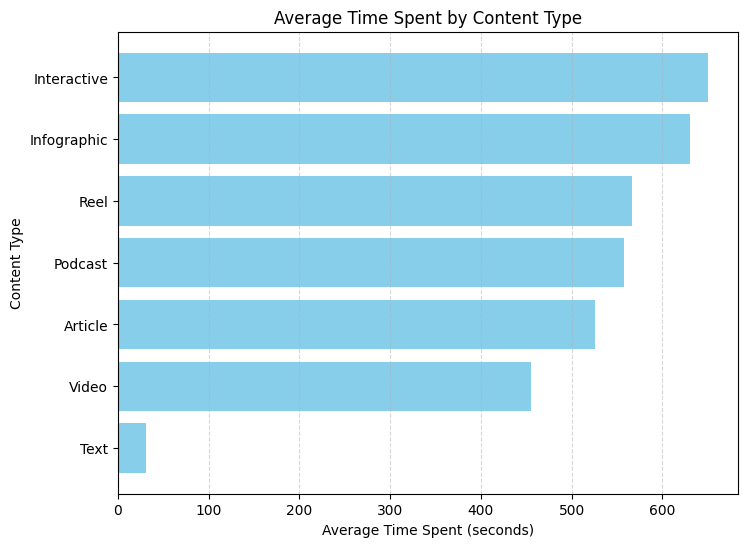

In [7]:
#Average time spend by content type
# Calculate average time spent per content type
avg_time = df.groupby('Content_Type')['Time_Spent'].mean().sort_values()

print(avg_time.index)
print(avg_time.values)
# Plotting bar graph(horizontal)
plt.figure(figsize=(8, 6))
plt.barh(avg_time.index, avg_time.values, color='skyblue')
plt.title("Average Time Spent by Content Type")
plt.xlabel("Average Time Spent (seconds)")
plt.ylabel("Content Type")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


* Interactive and Infographic content types receive the highest average time spent, so they are most engaging.
* Text-based content gets the least time, indicating lower user engagement 

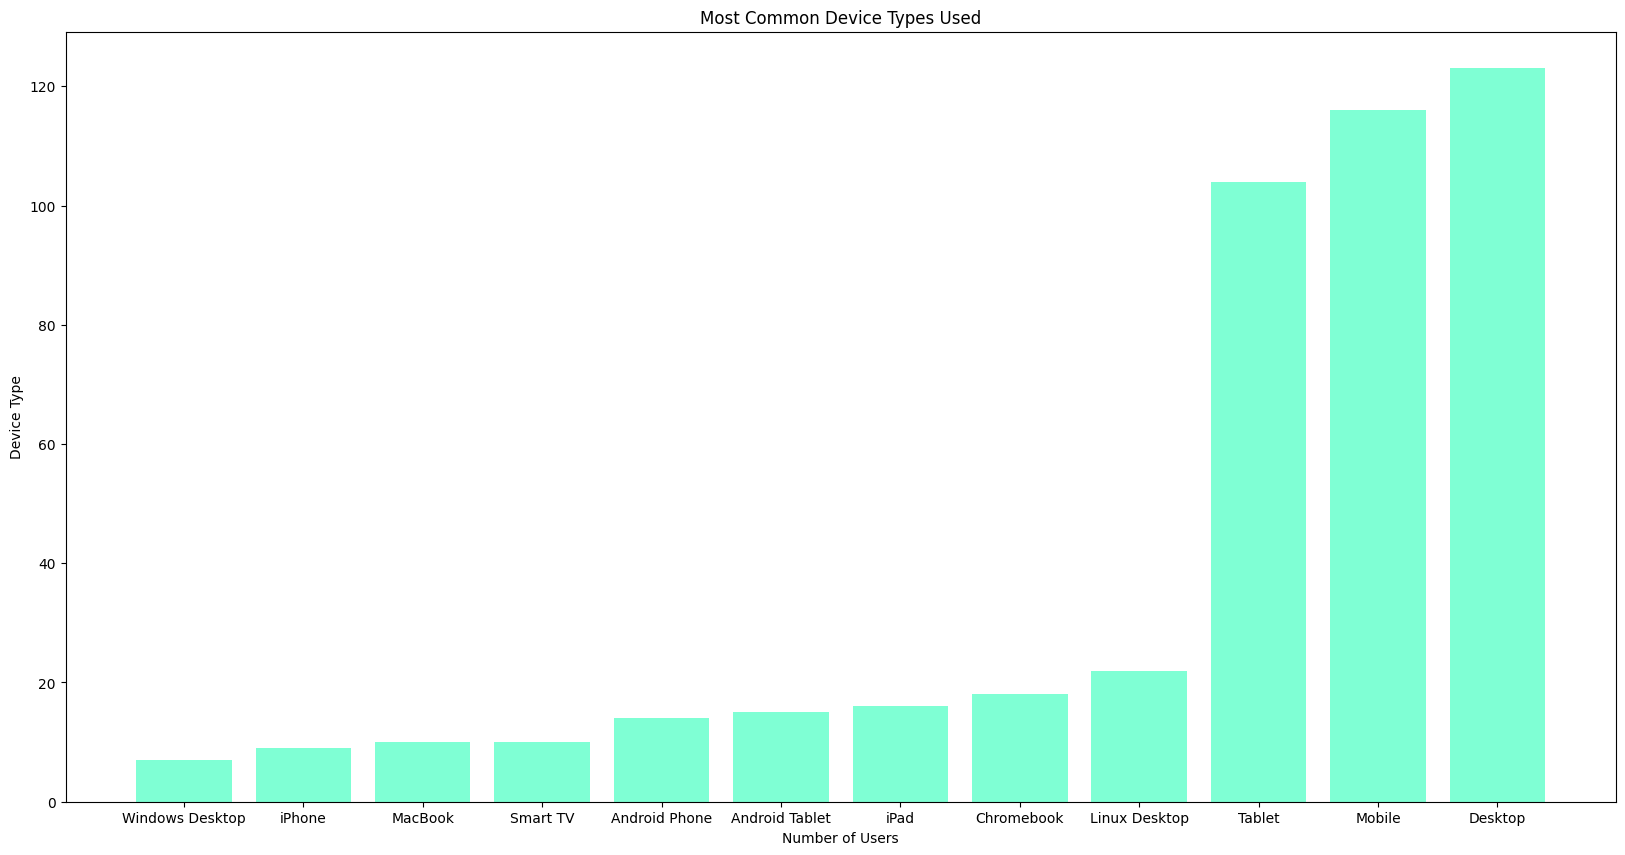

In [26]:
#Most used device types
device_counts = df['Device_Type'].value_counts().sort_values()
plt.figure(figsize=(20,10))

plt.bar(device_counts.index,device_counts.values, color="aquamarine")
plt.title("Most Common Device Types Used")
plt.xlabel("Number of Users")
plt.ylabel("Device Type")
plt.show()


* Desktops and Mobiles are the most frequently used
* Very few users access content via iPhones, Smart TVs or iPads

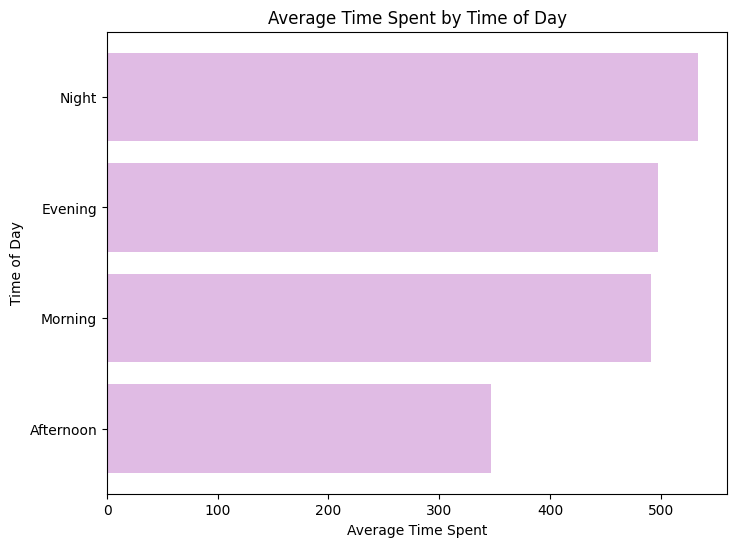

In [9]:
#Average Time Spent by Time of Day
avg = df.groupby('Time_Of_Day')['Time_Spent'].mean().sort_values()
plt.figure(figsize=(8, 6))
plt.barh(avg.index, avg.values, color="#E0BBE4")
plt.title("Average Time Spent by Time of Day")
plt.xlabel("Average Time Spent")
plt.ylabel("Time of Day")
plt.show()

* Highest average time spent is at Night, followed by Evening and Morning.
* Afternoon has the least engagement.

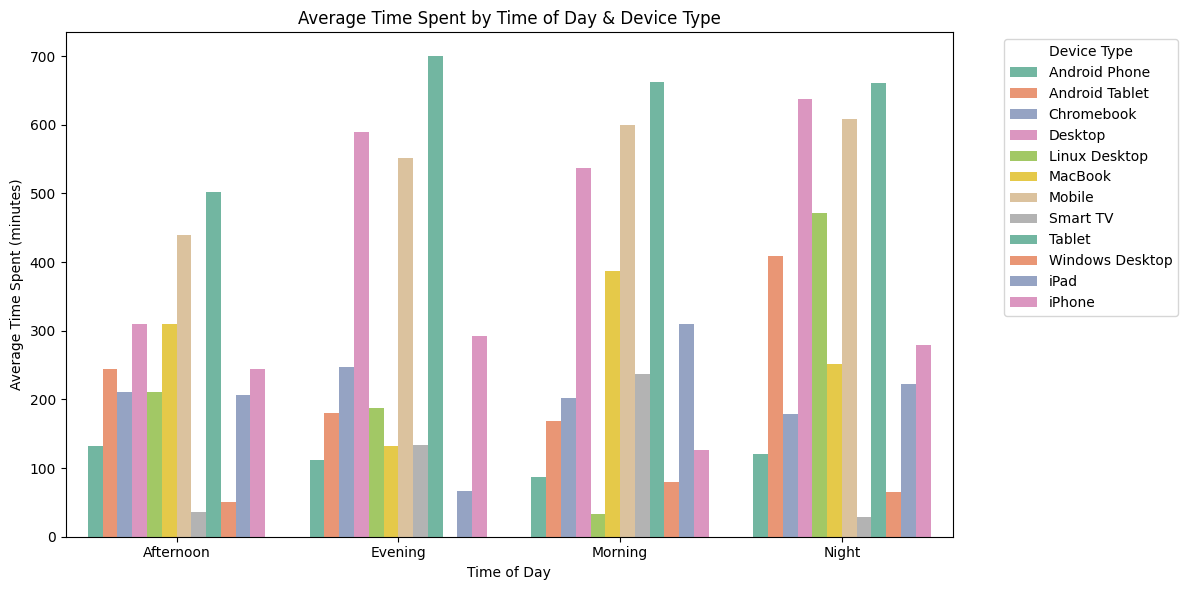

In [8]:
#Time_Spent varies based on both Device_Type and Time_Of_Day"
grouped = df.groupby(['Time_Of_Day', 'Device_Type'])['Time_Spent'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Time_Of_Day', y='Time_Spent', hue='Device_Type', palette='Set2')
plt.title('Average Time Spent by Time of Day & Device Type')
plt.ylabel('Average Time Spent (minutes)')
plt.xlabel('Time of Day')
plt.legend(title='Device Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Android phones have the highest engagement across all times, especially in the evening.
* Desktops are also used more during evenings and nights.
* Other devices show minimal usage and low time spent.
* Evening + Android/Desktop is the key combination for targeting user attention.

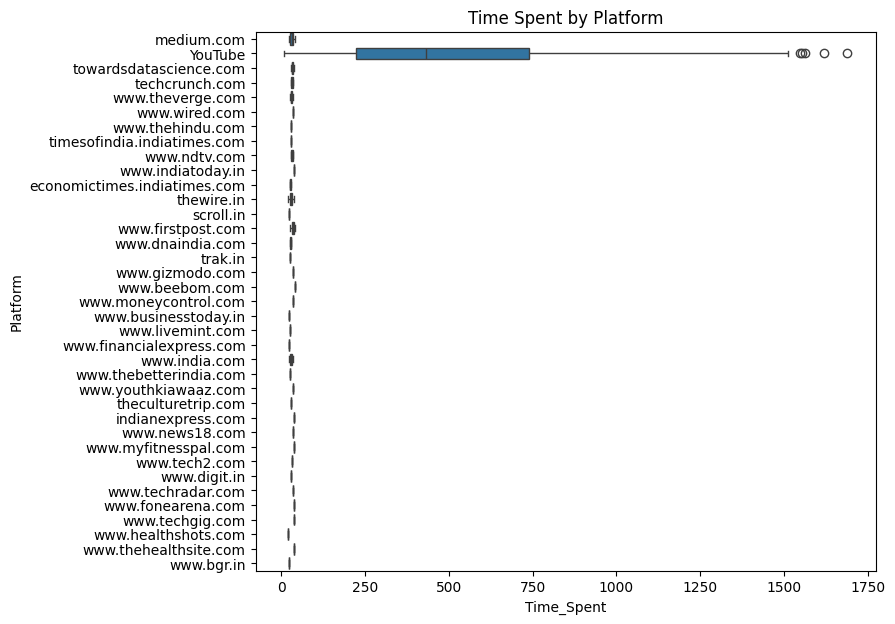

In [30]:
# Average time spent on each platform
plt.figure(figsize=(8,7))
df.groupby('Platform')['Time_Spent'].mean().sort_values(ascending=False)
sns.boxplot(y='Platform', x='Time_Spent', data=df) #orientation changed so that figure can fit
plt.title('Time Spent by Platform')
plt.show()

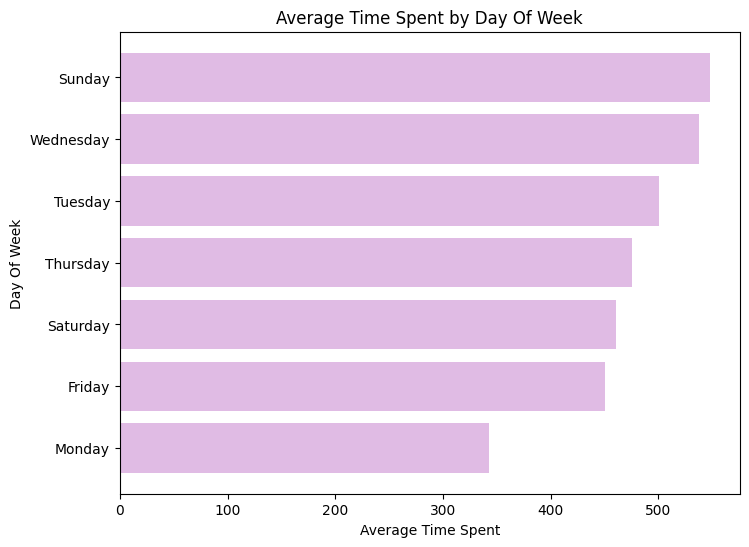

In [23]:
#Average Time Spent by Day Of Week
avg = df.groupby('Day_Of_Week')['Time_Spent'].mean().sort_values()
plt.figure(figsize=(8, 6))
plt.barh(avg.index, avg.values, color="#E0BBE4")
plt.title("Average Time Spent by Day Of Week")
plt.xlabel("Average Time Spent")
plt.ylabel("Day Of Week")
plt.show()

* Highest average time spent is on Sunday, followed by Wednesday and Tuesday.
* Monday has the least engagement.

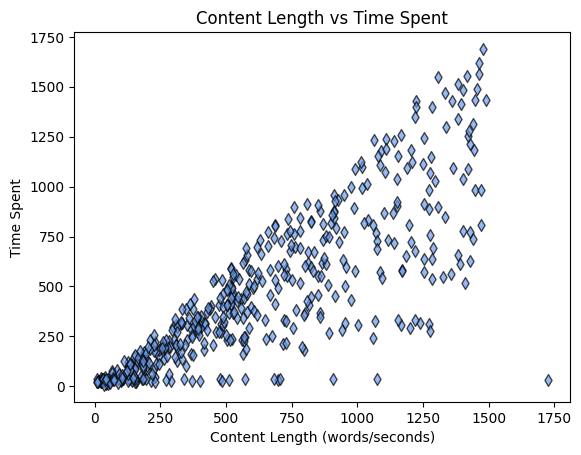

In [10]:
#Content length vs time spend
plt.scatter(df['Content_Length'], df['Time_Spent'], facecolor="#699CED",edgecolor="black",linewidth=1, marker="d", alpha=0.7)
plt.title("Content Length vs Time Spent")
plt.xlabel("Content Length (words/seconds)")
plt.ylabel("Time Spent")
plt.show()


* As content length increases, users tend to spend more time engaging with it.
* For very long content, the time spent becomes more scattered, suggesting less consistent attention.
* Clustered Behavior in the lower-left quadrant indicates short content dominates the dataset. 


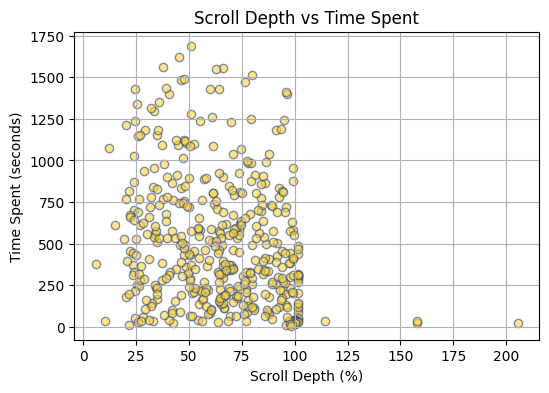

In [25]:
#Scroll length vs Time spend
plt.figure(figsize=(6,4))
plt.scatter(df['Scroll_Depth'], df['Time_Spent'], alpha=0.6, edgecolor='#2f4b7c', facecolor='#FFD23F')
plt.title("Scroll Depth vs Time Spent")
plt.xlabel("Scroll Depth (%)")
plt.ylabel("Time Spent (seconds)")
plt.grid(True)
plt.show()

Scrolling gives a slightly better idea of time spent, but it’s still not perfect as users who scrolled more often spent more time on the page but this also isn’t always true as some people scrolled a lot but didn’t stay long enough.

* Some users scrolled a lot (like 115, 155, 210), but spent very little time — which is surprising.
* Others barely scrolled (like 5.9, 10.7, 12.2), but spent a long time — between 6 to 18 minutes.
* This means users might be watching videos or reading without scrolling much — called passive engagement.


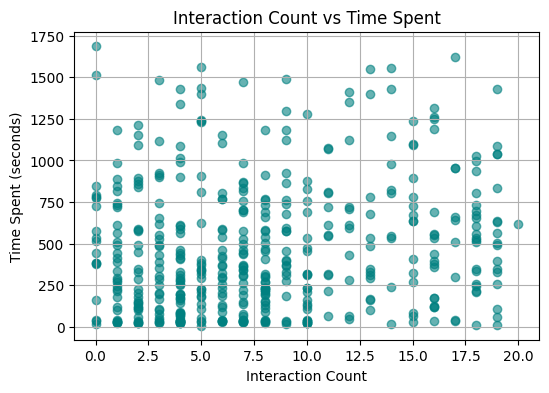

In [27]:
#Interaction count vs Time spend
plt.figure(figsize=(6,4))
plt.scatter(df['Interaction_Count'], df['Time_Spent'], color='teal', alpha=0.6)
plt.title("Interaction Count vs Time Spent")
plt.xlabel("Interaction Count")
plt.ylabel("Time Spent (seconds)")
plt.grid(True)
plt.show()


Just counting clicks doesn’t clearly show how long someone stays as people who clicked or interacted more didn’t always spend more time and some users spent a lot of time even with very few interactions.

* No clear trend between Interaction Count and Time Spent.
* Low interactions (0–8) still show high time spent, high interactions (10–20) don’t guarantee more time.
* Some users spend long time with minimal or zero interaction -> passive engagement

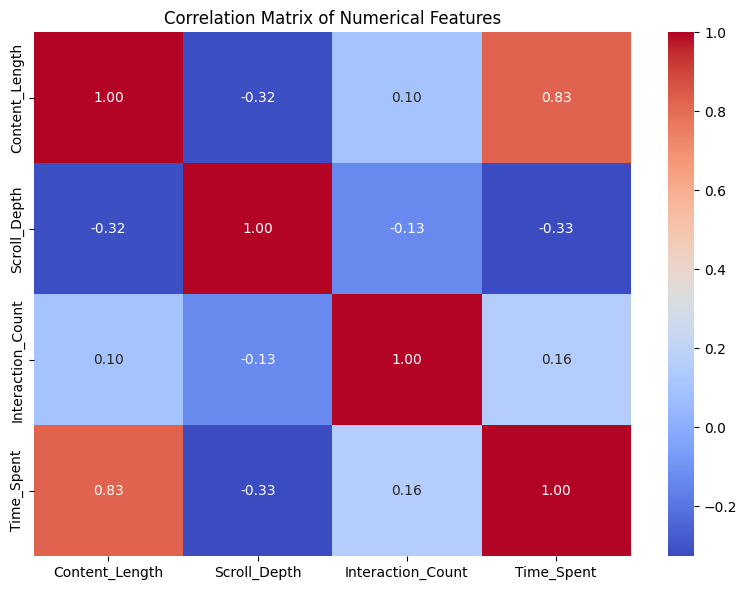

In [28]:
#using correlation matrix to understand how numerical features (Content_Length, Scroll_Depth, Interaction_Count, Time_Spent) relate to each other.
# Select only numerical features for correlation
num_cols = ['Content_Length', 'Scroll_Depth', 'Interaction_Count', 'Time_Spent']
corr_matrix = df[num_cols].corr()
# Plot correlation heatmap, other 2 members did this too
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

* Content_Length has a strong positive correlation with Time_Spent (0.83) → longer content = more engagement.
* Scroll_Depth shows a moderate negative correlation with both Content_Length and Time_Spent → users may not scroll much on longer content.
* Interaction_Count has a weak correlation with Time_Spent → interactions dont strongly impact attention.



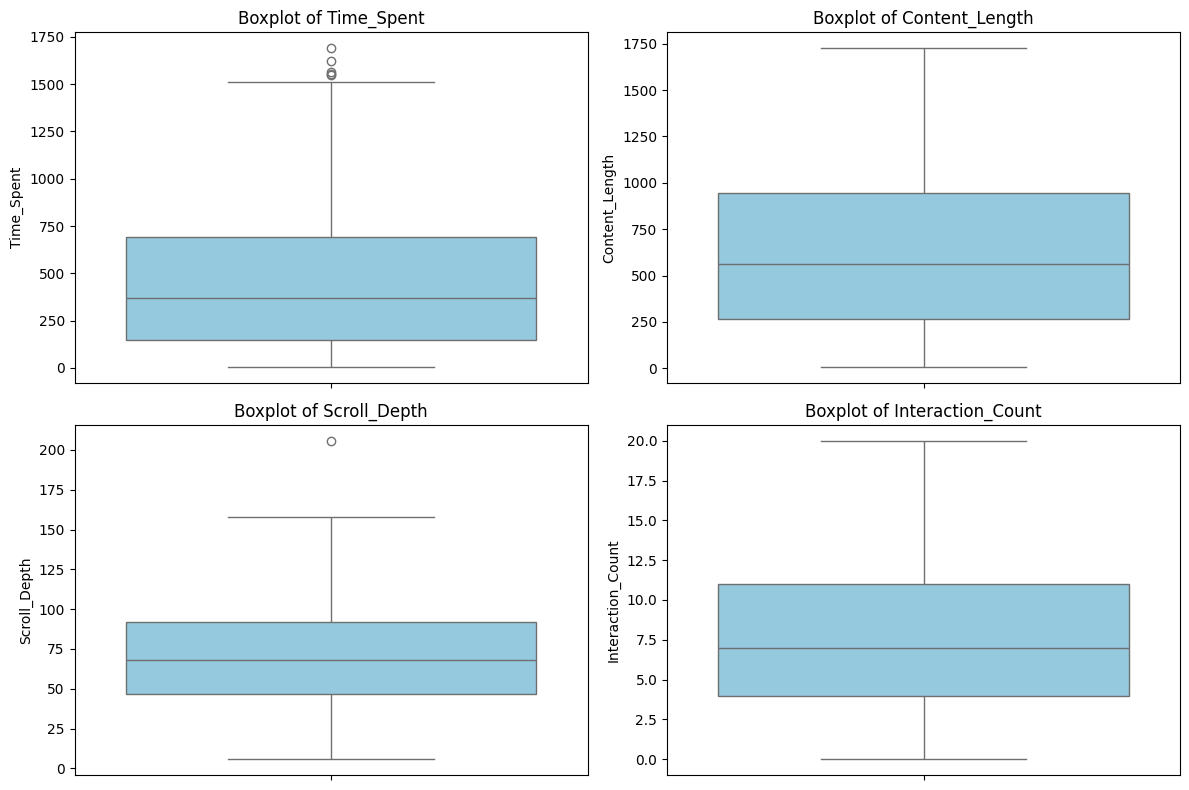

In [29]:
#boxplots and distributions and outliers in numeric features, overlaps with other 2 members but outlier interprettation here
num_cols = ['Time_Spent', 'Content_Length', 'Scroll_Depth', 'Interaction_Count']
# Plot boxplots for all numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

* Time_Spent and Scroll_Depth contain notable outliers that could affect statistical models.
* Other features are stable, showing consistent user behavior across entries.


### **FINAL INSIGHTS**

**Content Engagement:**
* Interactive and Infographic content types had the highest average time spent, showing they are the most engaging.
* Text content had the lowest engagement, with users spending the least time on it.

**Device Usage Trends:**
* Mobile and Desktop were the most used device types.
* Android phones had the highest user engagement, especially during Evening and Night.
* Devices like iPads, iPhones, and Smart TVs had minimal use.

**Time of Day Analysis:**
* Users spent the most time at Night, followed by Evening and Morning.
* Afternoon showed the least engagement overall.

**Day of the Week Insights:**
* Sunday recorded the highest average time spent.
* Monday had the lowest engagement, likely due to weekday distractions.

**Platform Comparison:**
* Some platforms (like YouTube or interactive platforms) showed higher average time spent, though details may vary based on user base and content type.

**Content Length Impact:**
* A positive correlation was observed between Content Length and Time Spent — longer content attracted more attention.
* However, for extremely long content, user attention became inconsistent.

**Scroll Depth Correlation:**
* Higher Scroll Depth generally correlated with higher Time Spent, especially for text-based content.